## Projet 2: Analysez des données de systèmes éducatifs

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib as mpl
#pd.options.display.max_rows = 11300

In [2]:
###  Importation de fiche (EdstatsData)

data=pd.read_csv(r'C:\Users\Tewod\OneDrive\Bureau\Openclassrooms\projets\projet_2\data\EdStatsData.csv')
data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
### Taille totale des données

Taille_data=data.size

Taille_data

62085100

In [4]:
## Les données manquées par chaque colonne

data_manquante=data.isnull().sum()
data_manquante

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [5]:
### La somme de données manquées 

data_manquante=data.isnull().sum().sum()
data_manquante

53455179

In [6]:
### proportion de données manquantes

percentage_manquante_data= data_manquante/Taille_data*100

percentage_manquante_data

86.09985165522806

In [7]:
### Percentage_données manquantes par les colonnes

data.isnull().sum() * 100 / len(data)

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

In [8]:
### som de duplicate

sum(data.duplicated())

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [10]:
### les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

data.shape

(886930, 70)

In [30]:
### Eviter les deux colonnes Non-Pertinents

data = data.drop(["Country Code","Indicator Code"], axis=1) 
data

,Country Name,Indicator Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,"Adjusted net enrolment rate, lower secondary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,"Adjusted net enrolment rate, primary, both sex...",54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,"Youth illiterate population, 15-24 years, male...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,"Youth literacy rate, population 15-24 years, b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,"Youth literacy rate, population 15-24 years, f...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,"Youth literacy rate, population 15-24 years, g...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
### Ranger les colonnes et lignes avec stack() et unstack ()

df1 = (data.set_index(['Country Name','Indicator Name'])
         .stack()
         .unstack(1)
         .rename_axis(columns=None, index=('Country Name','Year'))
         .reset_index())
df1.head(5)

,Country Name,Year,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)",...,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Male,Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total,"Youth illiterate population, 15-24 years, % female","Youth illiterate population, 15-24 years, both sexes (number)","Youth illiterate population, 15-24 years, female (number)","Youth illiterate population, 15-24 years, male (number)","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1974,7.05911,2.53138,0.22154,11.42652,NaN,NaN,0.19066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# En utilisant la boucle for, je calcule les données manquantes pour les colonnes

colonnes_avec_nan=df1.columns[df1.isnull().any()]

for column in colonnes_avec_nan:
    
     print(column, df1[column].isnull().sum())

Adjusted net enrolment rate, lower secondary, both sexes (%) 11781
Adjusted net enrolment rate, lower secondary, female (%) 11926
Adjusted net enrolment rate, lower secondary, gender parity index (GPI) 11938
Adjusted net enrolment rate, lower secondary, male (%) 11938
Adjusted net enrolment rate, primary, both sexes (%) 10970
Adjusted net enrolment rate, primary, female (%) 11254
Adjusted net enrolment rate, primary, gender parity index (GPI) 10021
Adjusted net enrolment rate, primary, male (%) 11254
Adjusted net enrolment rate, upper secondary, both sexes (%) 13413
Adjusted net enrolment rate, upper secondary, female (%) 13425
Adjusted net enrolment rate, upper secondary, gender parity index (GPI) 13425
Adjusted net enrolment rate, upper secondary, male (%) 13425
Adjusted net intake rate to Grade 1 of primary education, both sexes (%) 9568
Adjusted net intake rate to Grade 1 of primary education, female (%) 9754
Adjusted net intake rate to Grade 1 of primary education, gender parity i

In [33]:
## J'ai décidé de supprimer les colonnes contenant plus de 67% de données manquantes.


for column in colonnes_avec_nan: 
    
    if df1[column].isnull().sum()*100.0/len(df1) > 67:
          
        df1.drop(column,1, inplace=True)

In [34]:
### Numero les lignes et colonnes

df1.shape

(14186, 312)

In [35]:
# Percentage de NaN sur la colonne

df1.isnull().sum()*100/len(df1)

Country Name                                                                       0.000000
Year                                                                               0.000000
Enrolment in Grade 1 of lower secondary general education, both sexes (number)    61.708727
Enrolment in Grade 1 of lower secondary general education, female (number)        64.211194
Enrolment in Grade 1 of primary education, both sexes (number)                    49.887213
                                                                                    ...    
Theoretical duration of secondary education (years)                               33.307486
Theoretical duration of upper secondary education (years)                         32.955026
Unemployment, female (% of female labor force)                                    61.391513
Unemployment, male (% of male labor force)                                        61.391513
Unemployment, total (% of total labor force)                                    

### Sélectionner les colonnes pertinentes

In [50]:
# sélectionner les colonnes pertinentes et renomer


# Je sélectionne trois grandes cagories d'indicateurs sur 126 indicateurs. Ceux-ci sont:

# 1. Indicateur économique 

     # 1.1 GDP per capita (current US$)
    
# 2. Indicator de technologie  
     
    # 1.1 Internet users (per 100 people)
    
#3.Indicateur démographique
  

   # 2.1 Population, total
   # 2.2 Population, ages 15-24, total

# 3. Niveau d'éducation
   
    # 3.1 Enrolment in secondary education, both sexes (number)
   
    # 3.2 Enrolment in tertiary education, all programmes, both sexes (number)
    

df2=df1[['Country Name','Year','GDP per capita (current US$)', 'Internet users (per 100 people)','Population, total','Population, ages 15-24, total','Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)']]

df2=df2.rename(columns={'GDP per capita (current US$)':'GDP_per_capita_current_us$'})

df2

,Country Name,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
0,Afghanistan,1970,157.187422,NaN,11126123.0,NaN,116174.0,7732.0
1,Afghanistan,1971,160.372836,NaN,11417825.0,NaN,134069.0,9409.0
2,Afghanistan,1972,136.117014,NaN,11721940.0,NaN,153060.0,9817.0
3,Afghanistan,1973,144.110319,NaN,12027822.0,NaN,165346.0,11487.0
4,Afghanistan,1974,174.942038,NaN,12321541.0,NaN,172797.0,10956.0
...,...,...,...,...,...,...,...,...
14181,Zimbabwe,2080,NaN,NaN,NaN,NaN,NaN,NaN
14182,Zimbabwe,2085,NaN,NaN,NaN,NaN,NaN,NaN
14183,Zimbabwe,2090,NaN,NaN,NaN,NaN,NaN,NaN
14184,Zimbabwe,2095,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
## Pour verifer les data types des colonnes et changer si besoin

df2.dtypes

Country Name                                                             object
Year                                                                     object
GDP_per_capita_current_us$                                              float64
Internet users (per 100 people)                                         float64
Population, total                                                       float64
Population, ages 15-24, total                                           float64
Enrolment in secondary education, both sexes (number)                   float64
Enrolment in tertiary education, all programmes, both sexes (number)    float64
dtype: object

In [52]:
### Changement le type de données  pour la colonne "Year" de float à Int

df2["Year"]=df2["Year"].astype(str).astype(int)

df2["Year"]

0        1970
1        1971
2        1972
3        1973
4        1974
         ... 
14181    2080
14182    2085
14183    2090
14184    2095
14185    2100
Name: Year, Length: 14186, dtype: int32

In [53]:
###  type de données corrigé

df2.Year.dtypes

dtype('int32')

In [54]:
# Calculer le nombre de Nan par ligne

for i in df2['Year']:
    
    print(i, " : " ,  df2.iloc[i].isnull().sum())

1970  :  0
1971  :  0
1972  :  3
1973  :  6
1974  :  6
1975  :  6
1976  :  6
1977  :  6
1978  :  6
1979  :  6
1980  :  6
1981  :  6
1982  :  6
1983  :  6
1984  :  6
1985  :  6
1986  :  6
1987  :  6
1988  :  6
1989  :  6
1990  :  4
1991  :  2
1992  :  2
1993  :  3
1994  :  4
1995  :  5
1996  :  5
1997  :  5
1998  :  5
1999  :  5
2000  :  4
2001  :  4
2002  :  4
2003  :  4
2004  :  4
2005  :  4
2006  :  4
2007  :  5
2008  :  5
2009  :  4
2010  :  2
2011  :  2
2012  :  3
2013  :  2
2014  :  2
2015  :  2
2016  :  2
2017  :  1
1970  :  0
1971  :  0
1972  :  3
1973  :  6
1974  :  6
1975  :  6
1976  :  6
1977  :  6
1978  :  6
1979  :  6
1980  :  6
1981  :  6
1982  :  6
1983  :  6
1984  :  6
1985  :  6
1986  :  6
1987  :  6
1988  :  6
1989  :  6
1990  :  4
1991  :  2
1992  :  2
1993  :  3
1994  :  4
1995  :  5
1996  :  5
1997  :  5
1998  :  5
1999  :  5
2000  :  4
2001  :  4
2002  :  4
2003  :  4
2004  :  4
2005  :  4
2006  :  4
2007  :  5
2008  :  5
2009  :  4
2010  :  2
2011  :  2
2012  :  3

In [55]:
### Je limite la colonne de l'année ("Year") à l'année 2016 car la plupart des données  manquantes sont après 2016

df2=df2[df2["Year"]<2016]

df2

,Country Name,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
0,Afghanistan,1970,157.187422,NaN,11126123.0,NaN,116174.0,7732.0
1,Afghanistan,1971,160.372836,NaN,11417825.0,NaN,134069.0,9409.0
2,Afghanistan,1972,136.117014,NaN,11721940.0,NaN,153060.0,9817.0
3,Afghanistan,1973,144.110319,NaN,12027822.0,NaN,165346.0,11487.0
4,Afghanistan,1974,174.942038,NaN,12321541.0,NaN,172797.0,10956.0
...,...,...,...,...,...,...,...,...
14163,Zimbabwe,2011,840.949880,8.400000,14386649.0,3389423.0,NaN,93285.0
14164,Zimbabwe,2012,968.163871,12.000000,14710826.0,3383141.0,936734.0,94012.0
14165,Zimbabwe,2013,1026.388289,15.500000,15054506.0,3371070.0,957461.0,94115.0
14166,Zimbabwe,2014,1031.104616,16.364740,15411675.0,3354236.0,NaN,NaN


In [56]:
### Calculer le tail de données 

Taille_data1=df2.size

Taille_data1

88816

In [57]:
### Calculer le NaN de données  par les colonnes

data_manquante1=df2.isnull().sum()

data_manquante1

Country Name                                                               0
Year                                                                       0
GDP_per_capita_current_us$                                              2117
Internet users (per 100 people)                                         5886
Population, total                                                        179
Population, ages 15-24, total                                           6314
Enrolment in secondary education, both sexes (number)                   3705
Enrolment in tertiary education, all programmes, both sexes (number)    4503
dtype: int64

In [58]:
### Som de la NaN 

data_manquante2=df2.isnull().sum().sum()

data_manquante2

22704

In [59]:
### proportion de données manquantes.

percentage_manquante_data1= data_manquante2/Taille_data1*100

percentage_manquante_data1

25.562961628535398

In [60]:
### proportion de données manquantes par chacque colonnes

df2.isnull().sum() * 100 / len(df2)

Country Name                                                             0.000000
Year                                                                     0.000000
GDP_per_capita_current_us$                                              19.068636
Internet users (per 100 people)                                         53.017474
Population, total                                                        1.612322
Population, ages 15-24, total                                           56.872636
Enrolment in secondary education, both sexes (number)                   33.372365
Enrolment in tertiary education, all programmes, both sexes (number)    40.560259
dtype: float64

In [61]:
### Calculaer le som de doublon. Il n ya pas des DOUBLON

sum(df2.duplicated())

0

### Data Frame EdStatsCountry pour le merger avec EdStats data

In [62]:
## Importation de fiche (EdStatsCountry)

df_region=pd.read_csv(r'c:\Users\Tewod\OneDrive\Bureau\Openclassrooms\projets\projet_2\data\EdStatsCountry.csv')
df_region.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [63]:
### Selectionner les colonnes pertinents et renomer. 
### J'ai découvert que toutes les valeurs NaN dans le groupe "Region" et "Income Group" sont attribuées aux noms régionaux mis dans les colonnes "Country Name". 

df_region=df_region[['Short Name','Region','Income Group']]
df_region=df_region.rename(columns={"Short Name":"Country Name"})
df_region

,Country Name,Region,Income Group
0,Aruba,Latin America & Caribbean,High income: nonOECD
1,Afghanistan,South Asia,Low income
2,Angola,Sub-Saharan Africa,Upper middle income
3,Albania,Europe & Central Asia,Upper middle income
4,Andorra,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,Kosovo,Europe & Central Asia,Lower middle income
237,Yemen,Middle East & North Africa,Lower middle income
238,South Africa,Sub-Saharan Africa,Upper middle income
239,Zambia,Sub-Saharan Africa,Lower middle income


In [64]:
### ### Les 27 données manquantes sont des listes de blocs géographiques répertoriés sous le nom du pays

df_region_manquantes=df_region.isnull().sum()
df_region_manquantes

Country Name     0
Region          27
Income Group    27
dtype: int64

In [67]:
### Supprimer les 27 "NaN"

df_region.dropna(subset=["Region","Income Group"], inplace=True)
df_region.isnull().sum()

Country Name    0
Region          0
Income Group    0
dtype: int64

## Merger les deux data frame et observer le donnes manquante, les doublons et statistics classiques

In [68]:
df_merge=pd.merge(df_region,df2,on='Country Name', how="inner")

df_merge.head()

,Country Name,Region,Income Group,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
0,Aruba,Latin America & Caribbean,High income: nonOECD,1970,NaN,NaN,59063.0,NaN,NaN,NaN
1,Aruba,Latin America & Caribbean,High income: nonOECD,1971,NaN,NaN,59440.0,NaN,NaN,NaN
2,Aruba,Latin America & Caribbean,High income: nonOECD,1972,NaN,NaN,59840.0,NaN,NaN,NaN
3,Aruba,Latin America & Caribbean,High income: nonOECD,1973,NaN,NaN,60243.0,NaN,NaN,NaN
4,Aruba,Latin America & Caribbean,High income: nonOECD,1974,NaN,NaN,60528.0,NaN,NaN,NaN


### les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)

In [69]:
df_merge.shape

(8940, 10)

### les données manquantes et doublons

In [70]:
### Il n ya pas des DOUBLON

sum(df_merge.duplicated())

0

In [71]:
### données manquantes par les colonnes

df_merge_manquante=df_merge.isnull().sum()
df_merge_manquante

Country Name                                                               0
Region                                                                     0
Income Group                                                               0
Year                                                                       0
GDP_per_capita_current_us$                                              1668
Internet users (per 100 people)                                         4724
Population, total                                                         51
Population, ages 15-24, total                                           4568
Enrolment in secondary education, both sexes (number)                   3190
Enrolment in tertiary education, all programmes, both sexes (number)    3880
dtype: int64

In [72]:
### Calculer le tail de données fusionnées

Taille3=df_merge.size

Taille3

89400

In [73]:
## Som de la NaN 

data_manquante3=df_merge.isnull().sum().sum()

data_manquante3

18081

In [74]:
### proportion de données manquantes. Le pourcentage de données manquantes passe de 26% à 21%

percentage_manquante_data1=data_manquante3/Taille3*100

percentage_manquante_data1

20.2248322147651

In [75]:
### Le pourcentage de données manquantes par chaque colonne

df_merge_manquante/len(df_merge)*100

Country Name                                                             0.000000
Region                                                                   0.000000
Income Group                                                             0.000000
Year                                                                     0.000000
GDP_per_capita_current_us$                                              18.657718
Internet users (per 100 people)                                         52.841163
Population, total                                                        0.570470
Population, ages 15-24, total                                           51.096197
Enrolment in secondary education, both sexes (number)                   35.682327
Enrolment in tertiary education, all programmes, both sexes (number)    43.400447
dtype: float64

In [76]:
df_merge.describe()

,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
count,8940.000000,7272.000000,4216.000000,8.889000e+03,4.372000e+03,5.750000e+03,5.060000e+03
mean,1992.523266,8700.201314,20.051816,2.611925e+07,6.130495e+06,2.229117e+06,6.358382e+05
std,13.277584,16290.383024,26.112590,1.105805e+08,2.376668e+07,8.796873e+06,2.419419e+06
min,1970.000000,57.635252,0.000000,5.450000e+03,2.724000e+03,0.000000e+00,0.000000e+00
25%,1981.000000,621.312705,0.425236,6.885860e+05,4.411310e+05,6.098075e+04,1.024125e+04
50%,1993.000000,2185.194579,6.130000,4.531600e+06,1.191728e+06,3.484470e+05,9.790800e+04
75%,2004.000000,8784.686423,34.300000,1.339701e+07,3.775473e+06,1.086307e+06,3.109565e+05
max,2015.000000,192989.189527,98.323610,1.371220e+09,2.519161e+08,1.295421e+08,4.336739e+07


### Apres Je supprime quelque colonnes et lignes, je préfère de treate les données manquantes à l'aide des Moyenne et Médiane valuer. 

In [77]:
### J'ai essayé de verifier le traitement des données manquantes pour le "GDP per Capita " en utilisant la valeur moyenne basée sur le groupe de revenu (Income Group).  

### Cependant, Les résultats des «graphiques de distribution» sont biaisés vers la droite, ce qui indique qu'il existe un nombre considérable de valeurs aberrantes dans la colonne.

### En conséquence, j'ai choisi d'utiliser une autre méthode pour remplir les valeurs manquantes dans la colonne.



<IPython.core.display.Javascript object>


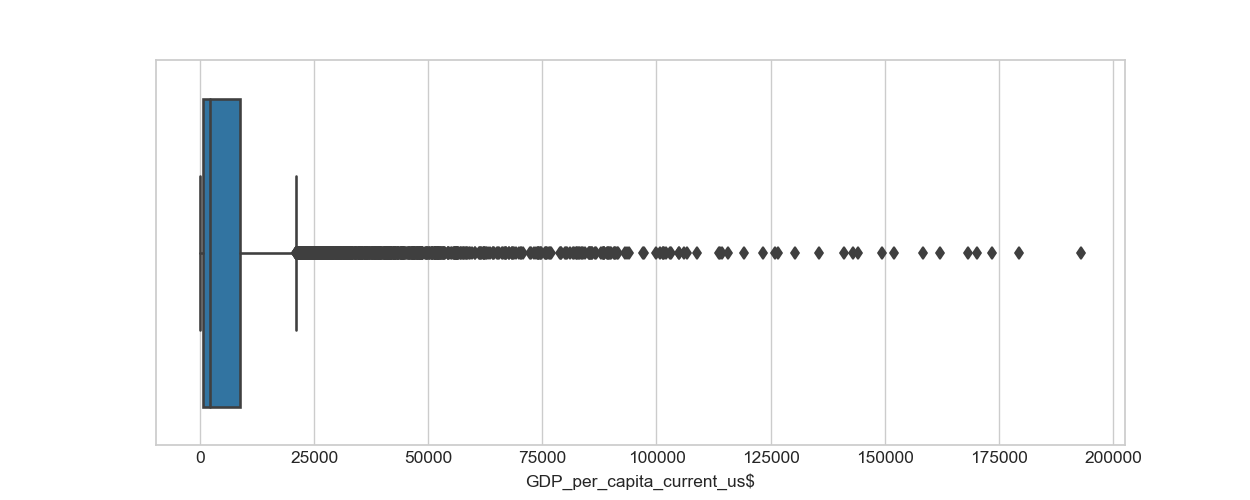

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_per_capita_current_us$'>

In [78]:
### Boxplot pour la colonne ("GDP_per_capita_current_us$")

fig,ax=plt.subplots(figsize=(10,4))
sns.boxplot(df_merge["GDP_per_capita_current_us$"])


<ipython-input-79-10ae99f3447a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp["GDP_per_capita_current_us$"]=df_gdp.loc[:,"GDP_per_capita_current_us$"] #fillna(21505.555849)


<IPython.core.display.Javascript object>


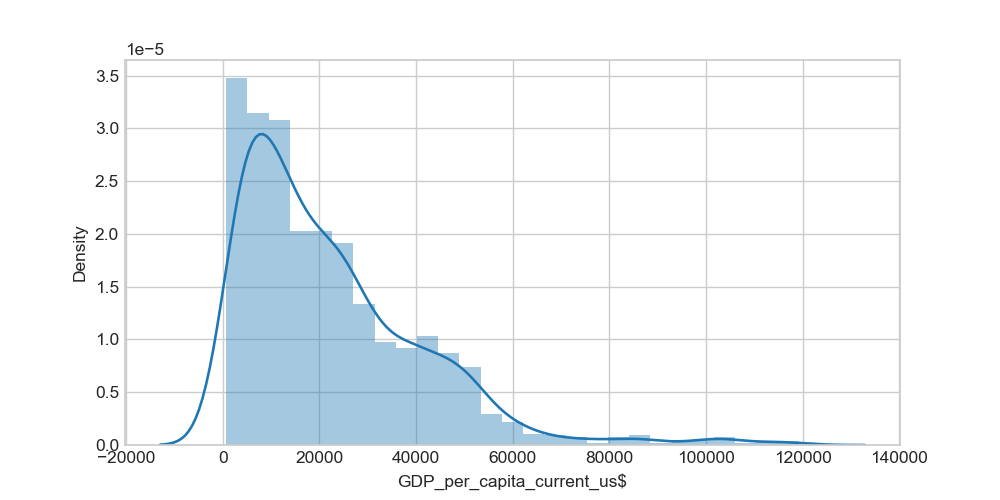

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_capita_current_us$', ylabel='Density'>

In [79]:
#### le diagramme de distribution de "Income group= High income:OECD" est incliné vers la droite.

df_gdp=df_merge[df_merge["Income Group"]== "High income: OECD"]

df_gdp["GDP_per_capita_current_us$"]=df_gdp.loc[:,"GDP_per_capita_current_us$"] #fillna(21505.555849)


fig,ax=plt.subplots(figsize=(8,4))

sns.distplot(df_gdp["GDP_per_capita_current_us$"])


<ipython-input-80-6f08e52d324c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp1["GDP_per_capita_current_us$"]=df_gdp1.loc[:,"GDP_per_capita_current_us$"] #fillna(21505.555849)


<IPython.core.display.Javascript object>


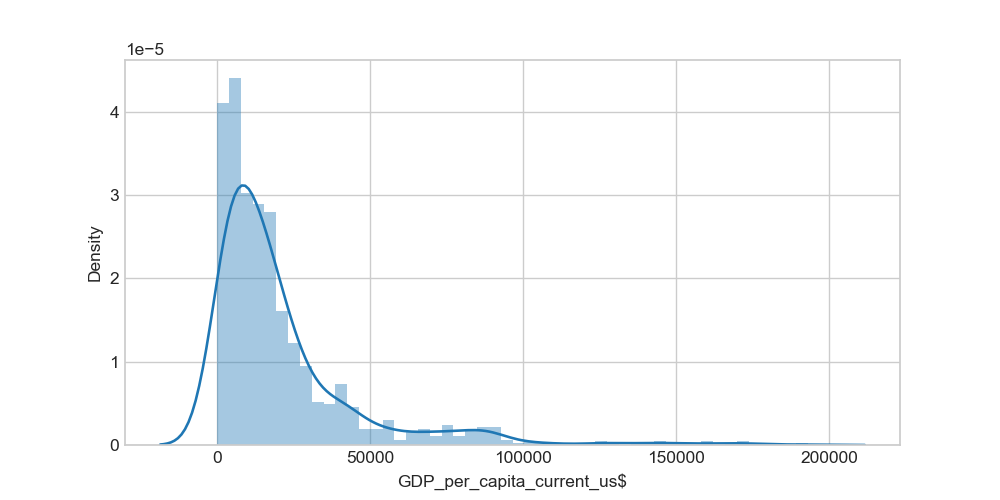

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_capita_current_us$', ylabel='Density'>

In [80]:
#### le diagramme de distribution de "Income group= High income:nonOECD" est incliné vers la droite.


df_gdp1=df_merge[df_merge["Income Group"]== "High income: nonOECD"]

df_gdp1["GDP_per_capita_current_us$"]=df_gdp1.loc[:,"GDP_per_capita_current_us$"] #fillna(21505.555849)


fig,ax=plt.subplots(figsize=(8,4))

sns.distplot(df_gdp1["GDP_per_capita_current_us$"])

<ipython-input-81-b6934a809e5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp2["GDP per capita (current US$)"]=df_gdp2.loc[:,"GDP_per_capita_current_us$"] #fillna(365.505634)


<IPython.core.display.Javascript object>


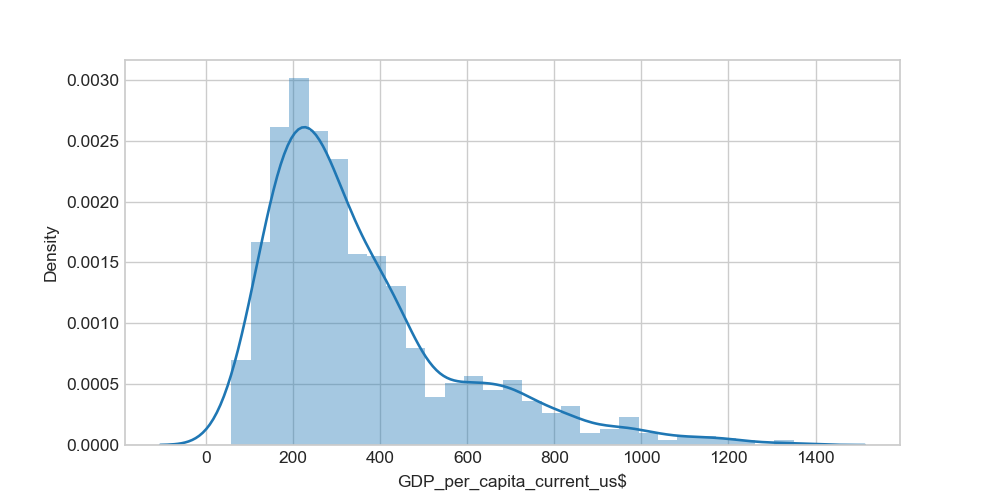

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_capita_current_us$', ylabel='Density'>

In [81]:
#### le diagramme de distribution de "Income group= Low income" est incliné vers la droite.


df_gdp2=df_merge[df_merge["Income Group"]== "Low income"]

df_gdp2["GDP per capita (current US$)"]=df_gdp2.loc[:,"GDP_per_capita_current_us$"] #fillna(365.505634)

fig,ax=plt.subplots(figsize=(8,4))

sns.distplot(df_gdp2["GDP_per_capita_current_us$"])

<ipython-input-82-747e69af0624>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp3["GDP_per_capita_current_us$"]=df_gdp3.loc[:,"GDP_per_capita_current_us$"] #fillna(21505.555849)


<IPython.core.display.Javascript object>


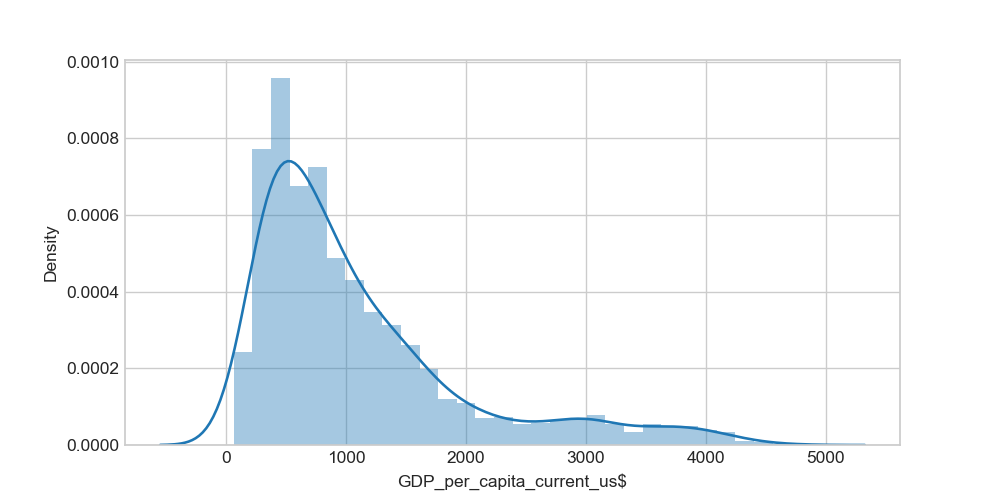

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_capita_current_us$', ylabel='Density'>

In [82]:
#### le diagramme de distribution de "Income group= Lower middle income" est incliné vers la droite.


df_gdp3=df_merge[df_merge["Income Group"]== "Lower middle income"]


df_gdp3["GDP_per_capita_current_us$"]=df_gdp3.loc[:,"GDP_per_capita_current_us$"] #fillna(21505.555849)


fig,ax=plt.subplots(figsize=(8,4))

sns.distplot(df_gdp3["GDP_per_capita_current_us$"])



<ipython-input-83-bf96b8fd3f8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp_fillna4["GDP_per_capita_current_us$"]=df_gdp_fillna4.loc[:,"GDP_per_capita_current_us$"]#.fillna(1139.104321)


<IPython.core.display.Javascript object>


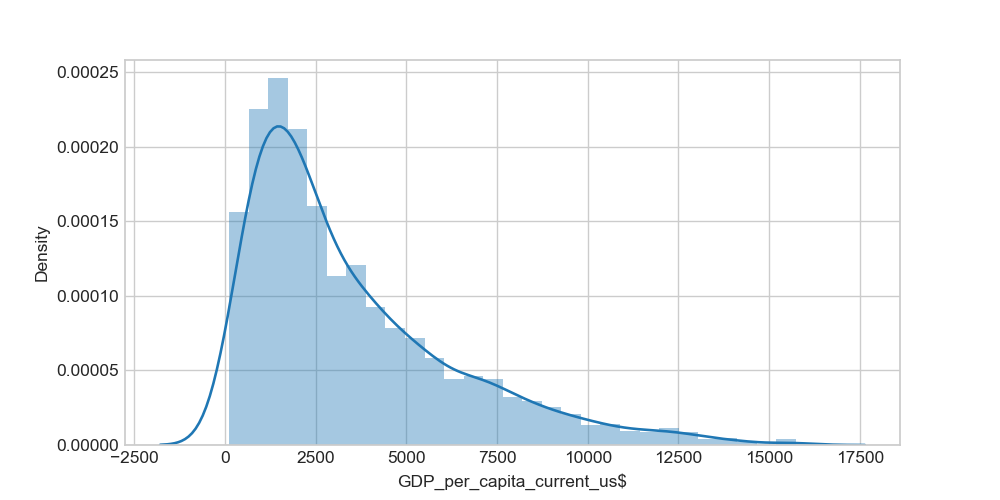

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP_per_capita_current_us$', ylabel='Density'>

In [83]:

#### le diagramme de distribution de "Income group= Upper middle income" est incliné vers la droite.


df_gdp_fillna4=df_merge[df_merge["Income Group"]== "Upper middle income"]

df_gdp_fillna4["GDP_per_capita_current_us$"]=df_gdp_fillna4.loc[:,"GDP_per_capita_current_us$"]#.fillna(1139.104321)


fig,ax=plt.subplots(figsize=(8,4))

sns.distplot(df_gdp_fillna4["GDP_per_capita_current_us$"])


<IPython.core.display.Javascript object>


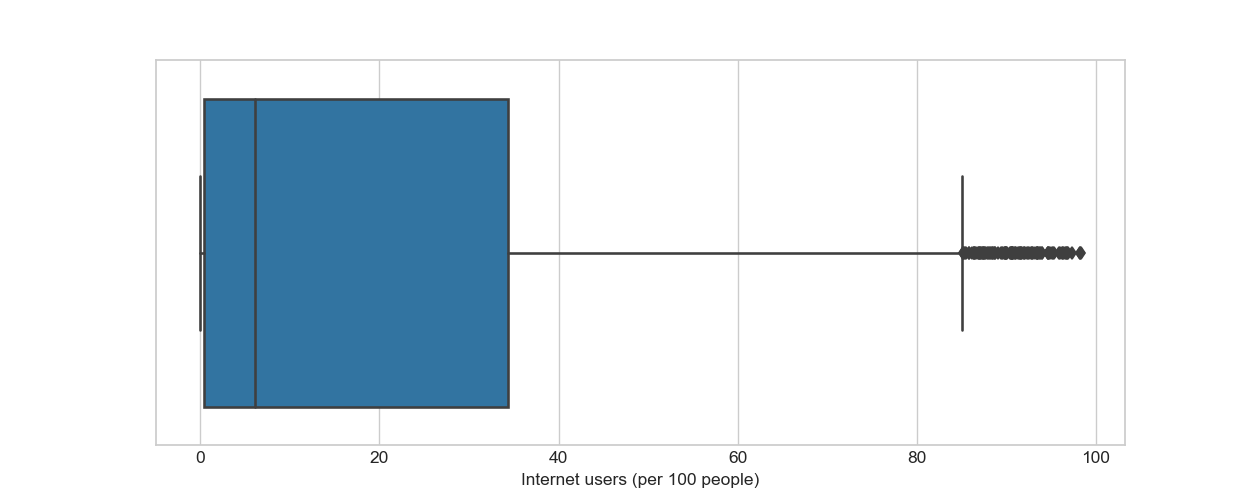

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Internet users (per 100 people)'>

In [84]:
## Il n'existe pas un niveau considérable de valeurs aberrantes dans le colonne "Internet users (per 100 people)". 
# Donc, Moyenne valeur peut peut être utilisé pour remplir les valeurs manquantes

fig,ax=plt.subplots(figsize=(10,4))
sns.boxplot(df_merge['Internet users (per 100 people)'])

<IPython.core.display.Javascript object>


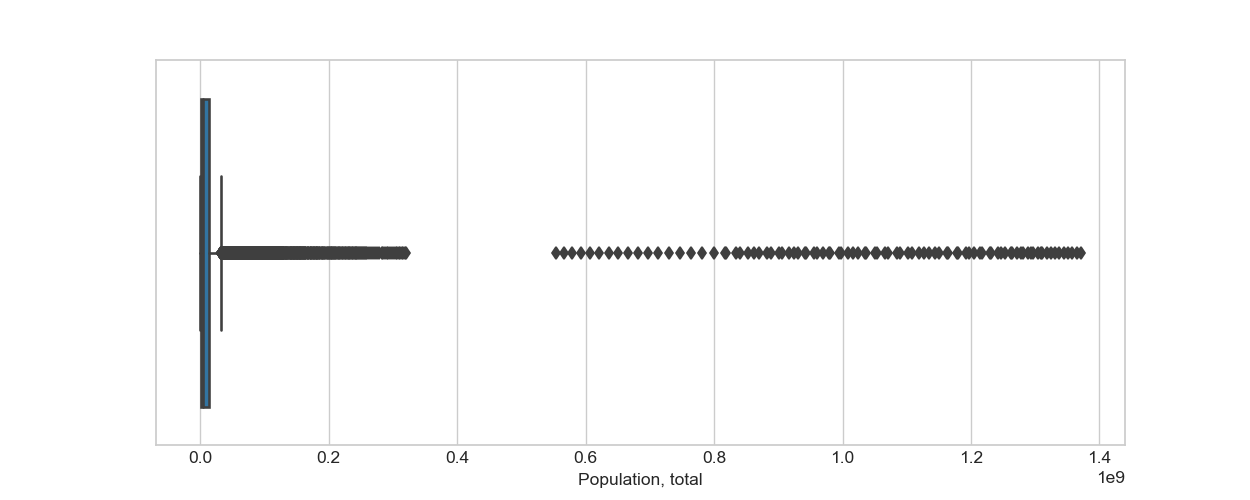

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population, total'>

In [85]:
### De très nombreuses valeurs aberrantes sur le colonne "Population total"

fig,ax=plt.subplots(figsize=(10,4))
sns.boxplot(df_merge['Population, total'])

<IPython.core.display.Javascript object>


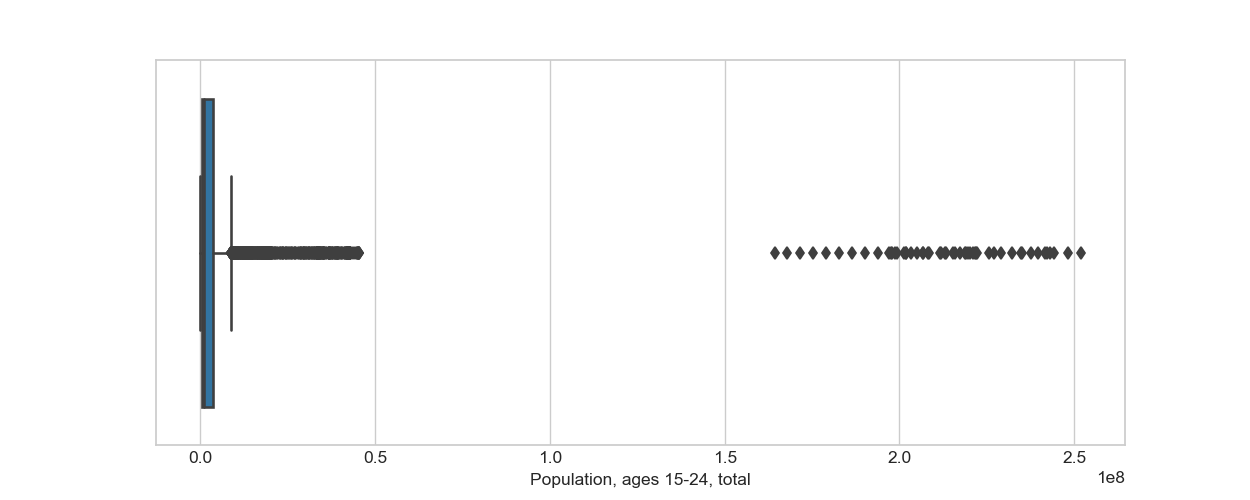

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population, ages 15-24, total'>

In [86]:
# De très nombreuses valeurs aberrantes sur le colonne "Population, ages 15-24, total "

fig,ax=plt.subplots(figsize=(10,4))
sns.boxplot(df_merge['Population, ages 15-24, total'])

<IPython.core.display.Javascript object>


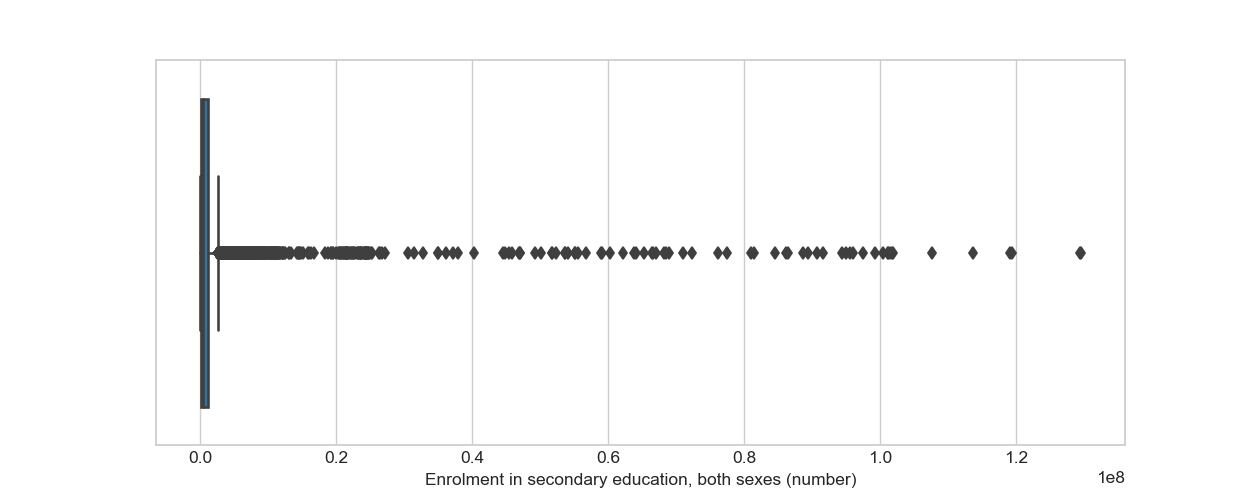

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Enrolment in secondary education, both sexes (number)'>

In [87]:
# De très nombreuses valeurs aberrantes sur le colonne "Enrolment in secondary education, both sexes (number)"

fig,ax=plt.subplots(figsize=(10,4))
sns.boxplot(df_merge['Enrolment in secondary education, both sexes (number)'])

<IPython.core.display.Javascript object>


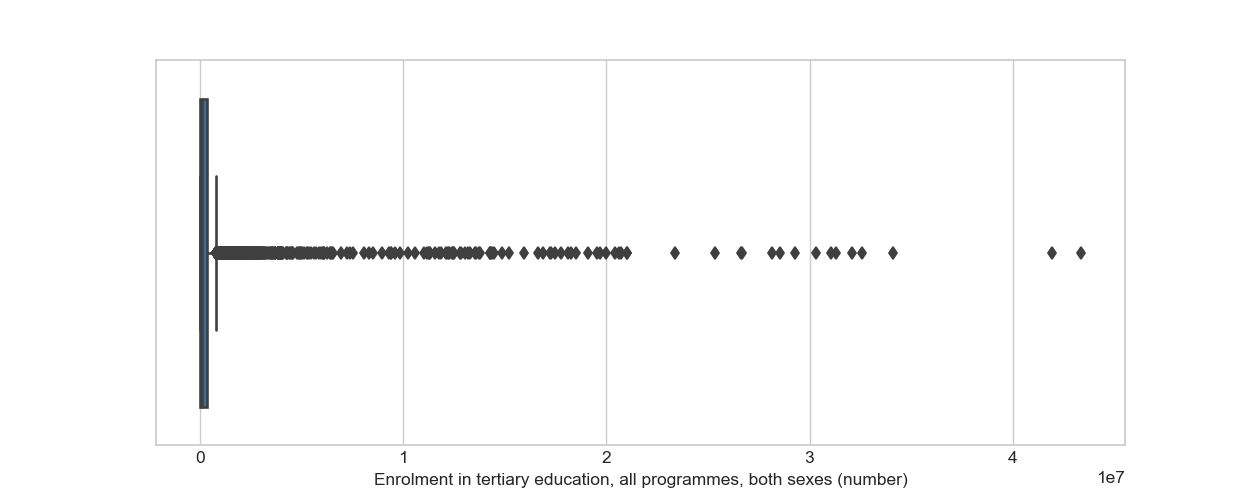

C:\Users\Tewod\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Enrolment in tertiary education, all programmes, both sexes (number)'>

In [88]:
# De très nombreuses valeurs aberrantes sur le colonne "Enrolment in secondary education, both sexes (number)"

fig,ax=plt.subplots(figsize=(10,4))
sns.boxplot(df_merge['Enrolment in tertiary education, all programmes, both sexes (number)'])

### Remplacement le NaN avec Moyenne et  Médiane

In [90]:
#J'utilise la fonction def avec des arguments pour remplir avec les valeurs médianes et moyennes

liste_colonnes=['GDP_per_capita_current_us$','Internet users (per 100 people)','Population, total','Population, ages 15-24, total','Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)']

def remplacement (liste_colonnes):
    
    for col in liste_colonnes:
    
        if col == 'Internet users (per 100 people)':
        
           df_merge[col] = df_merge[col].fillna(df_merge[col].mean())
        else:
            df_merge[col] = df_merge[col].fillna(df_merge[col].median())
        
remplacement(liste_colonnes)    

In [91]:
df_merge

,Country Name,Region,Income Group,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
0,Aruba,Latin America & Caribbean,High income: nonOECD,1970,2185.194579,20.051816,59063.0,1191728.0,348447.0,97908.0
1,Aruba,Latin America & Caribbean,High income: nonOECD,1971,2185.194579,20.051816,59440.0,1191728.0,348447.0,97908.0
2,Aruba,Latin America & Caribbean,High income: nonOECD,1972,2185.194579,20.051816,59840.0,1191728.0,348447.0,97908.0
3,Aruba,Latin America & Caribbean,High income: nonOECD,1973,2185.194579,20.051816,60243.0,1191728.0,348447.0,97908.0
4,Aruba,Latin America & Caribbean,High income: nonOECD,1974,2185.194579,20.051816,60528.0,1191728.0,348447.0,97908.0
...,...,...,...,...,...,...,...,...,...,...
8935,Zimbabwe,Sub-Saharan Africa,Low income,2011,840.949880,8.400000,14386649.0,3389423.0,348447.0,93285.0
8936,Zimbabwe,Sub-Saharan Africa,Low income,2012,968.163871,12.000000,14710826.0,3383141.0,936734.0,94012.0
8937,Zimbabwe,Sub-Saharan Africa,Low income,2013,1026.388289,15.500000,15054506.0,3371070.0,957461.0,94115.0
8938,Zimbabwe,Sub-Saharan Africa,Low income,2014,1031.104616,16.364740,15411675.0,3354236.0,348447.0,97908.0


In [92]:
### Verifier le NaN apres le remplacemlent. 

df_merge.isnull().sum()

Country Name                                                            0
Region                                                                  0
Income Group                                                            0
Year                                                                    0
GDP_per_capita_current_us$                                              0
Internet users (per 100 people)                                         0
Population, total                                                       0
Population, ages 15-24, total                                           0
Enrolment in secondary education, both sexes (number)                   0
Enrolment in tertiary education, all programmes, both sexes (number)    0
dtype: int64

In [93]:
####  J'ai sauvegardé les données propres


df_merge.to_csv("éducation_les_données_nettoyées.csv",index=False)

### Les statistique classiques pour les différentes zones géographiques et pays du monde

In [93]:
df=pd.read_csv("éducation_les_données_nettoyées.csv")

df.head(10)

,Country Name,Region,Income Group,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
0,Aruba,Latin America & Caribbean,High income: nonOECD,1970,2185.194579,20.051816,59063.0,1191728.0,348447.0,97908.0
1,Aruba,Latin America & Caribbean,High income: nonOECD,1971,2185.194579,20.051816,59440.0,1191728.0,348447.0,97908.0
2,Aruba,Latin America & Caribbean,High income: nonOECD,1972,2185.194579,20.051816,59840.0,1191728.0,348447.0,97908.0
3,Aruba,Latin America & Caribbean,High income: nonOECD,1973,2185.194579,20.051816,60243.0,1191728.0,348447.0,97908.0
4,Aruba,Latin America & Caribbean,High income: nonOECD,1974,2185.194579,20.051816,60528.0,1191728.0,348447.0,97908.0
5,Aruba,Latin America & Caribbean,High income: nonOECD,1975,2185.194579,20.051816,60657.0,1191728.0,348447.0,97908.0
6,Aruba,Latin America & Caribbean,High income: nonOECD,1976,2185.194579,20.051816,60586.0,1191728.0,348447.0,97908.0
7,Aruba,Latin America & Caribbean,High income: nonOECD,1977,2185.194579,20.051816,60366.0,1191728.0,348447.0,97908.0
8,Aruba,Latin America & Caribbean,High income: nonOECD,1978,2185.194579,20.051816,60103.0,1191728.0,348447.0,97908.0
9,Aruba,Latin America & Caribbean,High income: nonOECD,1979,2185.194579,20.051816,59980.0,1191728.0,348447.0,97908.0


In [94]:
df.describe()

,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
count,8940.000000,8940.000000,8940.000000,8.940000e+03,8.940000e+03,8.940000e+03,8.940000e+03
mean,1992.523266,7484.649722,20.051816,2.599610e+07,3.606973e+06,1.558050e+06,4.023741e+05
std,13.277584,14909.738688,17.930990,1.102766e+08,1.680176e+07,7.112028e+06,1.839541e+06
min,1970.000000,57.635252,0.000000,5.450000e+03,2.724000e+03,0.000000e+00,0.000000e+00
25%,1981.000000,810.641399,7.411594,7.008040e+05,1.191728e+06,1.826888e+05,6.876475e+04
50%,1993.000000,2185.194579,20.051816,4.531600e+06,1.191728e+06,3.484470e+05,9.790800e+04
75%,2004.000000,6209.294057,20.051816,1.326090e+07,1.191728e+06,5.897880e+05,1.222252e+05
max,2015.000000,192989.189527,98.323610,1.371220e+09,2.519161e+08,1.295421e+08,4.336739e+07


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country Name                                                          8940 non-null   object 
 1   Region                                                                8940 non-null   object 
 2   Income Group                                                          8940 non-null   object 
 3   Year                                                                  8940 non-null   int64  
 4   GDP_per_capita_current_us$                                            8940 non-null   float64
 5   Internet users (per 100 people)                                       8940 non-null   float64
 6   Population, total                                                     8940 non-null   float64
 7

#### Moyenne valuer d'indicator pour les Pays et Zones Géographiques

In [96]:
### Calculer le moyenne de "GDP_per_capita_current_us$" par les pays.

df_gdp_mean=df[["Country Name","GDP_per_capita_current_us$"]]
df_gdp_mean=df_gdp_mean.groupby("Country Name")["GDP_per_capita_current_us$"].mean().round(decimals=2).nlargest(20)
df_gdp_mean

Country Name
Monaco                  70745.96
Liechtenstein           65997.12
Luxembourg              47101.56
Norway                  38653.40
Bermuda                 37421.11
Switzerland             36813.45
Qatar                   32255.33
Denmark                 29645.20
United Arab Emirates    29466.28
Sweden                  28455.93
United States           27870.02
Iceland                 27162.19
Japan                   25308.51
Netherlands             25169.02
Finland                 24024.04
Austria                 23853.23
San Marino              23837.28
Australia               23339.39
Ireland                 23231.58
Canada                  23204.80
Name: GDP_per_capita_current_us$, dtype: float64

In [97]:
### Calculer le moyenne de " Internet users (per 100 people) " par les pays.

df_internet=df[["Country Name","Internet users (per 100 people)"]]
df_internet=df_internet.groupby("Country Name")["Internet users (per 100 people)"].mean().round(decimals=2).nlargest(20)
df_internet

Country Name
Iceland           41.57
Norway            40.62
Sweden            40.06
Bermuda           38.91
Netherlands       38.42
Denmark           38.38
Finland           37.73
Liechtenstein     37.46
Switzerland       36.67
Canada            36.49
New Zealand       36.12
Monaco            36.04
Luxembourg        35.52
United Kingdom    34.91
United States     34.66
Germany           33.77
Japan             33.62
Singapore         32.47
Australia         32.46
Austria           32.27
Name: Internet users (per 100 people), dtype: float64

In [98]:
### Calculer le moyenne de " Population, total " par les pays.

df_pop=df[["Country Name","Population, total"]]
df_pop=df_pop.groupby("Country Name")["Population, total"].mean().round(decimals=2).nlargest(20)

df_pop

Country Name
China             1.142764e+09
India             9.211931e+08
United States     2.608613e+08
Indonesia         1.876330e+08
Brazil            1.539286e+08
Japan             1.217511e+08
Pakistan          1.171908e+08
Bangladesh        1.123561e+08
Nigeria           1.070116e+08
Mexico            8.926686e+07
Germany           8.015391e+07
Vietnam           6.806653e+07
Philippines       6.685579e+07
France            5.920624e+07
United Kingdom    5.855821e+07
Italy             5.704793e+07
Ethiopia          5.666062e+07
Thailand          5.620577e+07
Turkey            5.608603e+07
Ukraine           4.899985e+07
Name: Population, total, dtype: float64

In [99]:
### Calculer le moyenne de " Population, ages 15-24, total" par les pays.

df_pop_jeune=df[["Country Name","Population, ages 15-24, total"]]
df_pop_jeune=df_pop_jeune.groupby("Country Name")["Population, ages 15-24, total"].mean().round(decimals=2).nlargest(20)

df_pop_jeune

Country Name
China            1.226971e+08
India            1.183444e+08
Indonesia        2.401763e+07
United States    2.372552e+07
Brazil           1.929075e+07
Pakistan         1.803043e+07
Bangladesh       1.706236e+07
Nigeria          1.562973e+07
Mexico           1.159482e+07
Vietnam          9.757632e+06
Philippines      9.609033e+06
Japan            9.209929e+06
Ethiopia         8.950655e+06
Turkey           8.043835e+06
Thailand         6.395752e+06
Germany          5.860103e+06
South Africa     5.692137e+06
Myanmar          5.626380e+06
Colombia         5.135700e+06
France           4.936649e+06
Name: Population, ages 15-24, total, dtype: float64

In [100]:
### Calculer le moyenne de "Enrolment in secondary education, both sexes (number)" par les pays

df_Secondaire=df[["Country Name","Enrolment in secondary education, both sexes (number)"]]
df_Secondaire=df_Secondaire.groupby("Country Name")["Enrolment in secondary education, both sexes (number)"].mean().nlargest(20)

df_Secondaire

Country Name
China             6.105614e+07
India             5.454265e+07
United States     1.891437e+07
Indonesia         1.135623e+07
Brazil            8.699908e+06
Japan             8.518223e+06
Mexico            7.022464e+06
France            5.280247e+06
Bangladesh        5.053601e+06
United Kingdom    4.905493e+06
Italy             4.699844e+06
Germany           4.468254e+06
Turkey            4.271202e+06
Pakistan          3.904420e+06
Spain             3.569477e+06
Philippines       3.552529e+06
Poland            3.032856e+06
Nigeria           2.964088e+06
Ukraine           2.787759e+06
Thailand          2.756926e+06
Name: Enrolment in secondary education, both sexes (number), dtype: float64

In [101]:
### Calculer le moyenne de "Enrolment in secondary education, both sexes (number)" par les pays

df_tertiary=df[["Country Name","Enrolment in tertiary education, all programmes, both sexes (number)"]]
df_tertiary=df_tertiary.groupby("Country Name")["Enrolment in tertiary education, all programmes, both sexes (number)"].mean().nlargest(20)

df_tertiary

Country Name
United States     1.367384e+07
China             1.037758e+07
India             8.269637e+06
Japan             2.769750e+06
Brazil            2.620548e+06
Indonesia         2.273084e+06
France            1.571070e+06
Philippines       1.535150e+06
Ukraine           1.526006e+06
United Kingdom    1.468158e+06
Mexico            1.455884e+06
Italy             1.447647e+06
Turkey            1.393545e+06
Spain             1.249883e+06
Thailand          1.200045e+06
Argentina         1.105358e+06
Poland            1.053346e+06
Colombia          7.643735e+05
Australia         6.855718e+05
Vietnam           6.594387e+05
Name: Enrolment in tertiary education, all programmes, both sexes (number), dtype: float64

In [102]:
## Le moyenne  PIB par habitant par "Income group"

df_gdp_income_group=df.groupby("Income Group")["GDP_per_capita_current_us$"].mean().nlargest()

df_gdp_income_group

Income Group
High income: OECD       20724.791378
High income: nonOECD    15668.599896
Upper middle income      3263.952433
Lower middle income      1301.886976
Low income                667.256894
Name: GDP_per_capita_current_us$, dtype: float64

In [103]:
## Le moyenne  PIB par habitant par Region

df_gdp_Region=df.groupby("Region")["GDP_per_capita_current_us$"].mean().nlargest()

df_gdp_Region

Region
North America                 29498.640767
Europe & Central Asia         14873.311325
Middle East & North Africa     8971.043162
East Asia & Pacific            6217.653577
Latin America & Caribbean      3828.395168
Name: GDP_per_capita_current_us$, dtype: float64

#### Médiane d'Indicators pour les Pays et Zones Géographiques 



In [104]:

df_gdp_médiane=df[["Country Name","GDP_per_capita_current_us$"]]
df_gdp_médiane=df_gdp_médiane.groupby("Country Name")["GDP_per_capita_current_us$"].median().round(decimals=2).nlargest(20)
df_gdp_médiane

Country Name
Monaco                  68505.41
Liechtenstein           55610.80
Luxembourg              41222.42
Switzerland             38413.80
Japan                   31639.45
United Arab Emirates    30379.85
Norway                  28956.39
Denmark                 28583.81
Sweden                  28126.12
Bermuda                 27270.91
Iceland                 26221.58
United States           25978.90
Austria                 24309.52
Finland                 24118.55
Germany                 23703.03
Netherlands             23213.13
Belgium                 22762.41
France                  22484.45
Qatar                   20996.12
Canada                  20704.77
Name: GDP_per_capita_current_us$, dtype: float64

In [105]:

df_internet_médiane=df[["Country Name","Internet users (per 100 people)"]]
df_internet_médiane=df_internet_médiane.groupby("Country Name")["Internet users (per 100 people)"].median().round(decimals=2).nlargest(20)
df_internet_médiane

Country Name
Afghanistan            20.05
Albania                20.05
Algeria                20.05
American Samoa         20.05
Andorra                20.05
Angola                 20.05
Antigua and Barbuda    20.05
Argentina              20.05
Armenia                20.05
Aruba                  20.05
Australia              20.05
Austria                20.05
Azerbaijan             20.05
Bahrain                20.05
Bangladesh             20.05
Barbados               20.05
Belarus                20.05
Belgium                20.05
Belize                 20.05
Benin                  20.05
Name: Internet users (per 100 people), dtype: float64

In [106]:

df_pop_médiane=df[["Country Name","Population, total"]]
df_pop_médiane=df_pop_médiane.groupby("Country Name")["Population, total"].median().round(decimals=2).nlargest(20)
df_pop_médiane

Country Name
China             1.171705e+09
India             9.150395e+08
United States     2.582165e+08
Indonesia         1.893228e+08
Brazil            1.558485e+08
Japan             1.243825e+08
Pakistan          1.152483e+08
Bangladesh        1.124585e+08
Nigeria           1.014916e+08
Mexico            8.971438e+07
Germany           8.035040e+07
Vietnam           6.904730e+07
Philippines       6.586287e+07
France            5.897899e+07
Thailand          5.810138e+07
United Kingdom    5.764951e+07
Italy             5.681445e+07
Turkey            5.620130e+07
Ethiopia          5.259036e+07
Ukraine           4.923338e+07
Name: Population, total, dtype: float64

In [107]:

df_pop_jeune_médiane=df[["Country Name","Population, ages 15-24, total"]]
df_pop_jeune_médiane=df_pop_jeune_médiane.groupby("Country Name")["Population, ages 15-24, total"].median().nlargest(20)
df_pop_jeune_médiane

Country Name
China            199007858.0
India            173374647.0
Indonesia         39365181.5
United States     36912010.0
Brazil            29975921.0
Bangladesh        23966642.5
Pakistan          21451987.5
Nigeria           18988158.0
Mexico            18946520.5
Vietnam           14059067.5
Philippines       13208537.0
Turkey            12317100.5
Japan             12313913.0
Ethiopia          10641813.0
Thailand           9398975.0
Germany            8995597.5
Myanmar            8668748.5
South Africa       7977627.0
France             7572426.5
Colombia           7358756.5
Name: Population, ages 15-24, total, dtype: float64

In [108]:
df_income_médiane=df[["Income Group","GDP_per_capita_current_us$"]]
df_income_médiane=df_income_médiane.groupby("Income Group")["GDP_per_capita_current_us$"].median()
df_income_médiane

Income Group
High income: OECD       15270.654772
High income: nonOECD     7020.052443
Low income                338.522947
Lower middle income      1015.301959
Upper middle income      2185.194579
Name: GDP_per_capita_current_us$, dtype: float64

In [109]:
df_region_médiane=df[["Region","GDP_per_capita_current_us$"]]
df_region_médiane=df_region_médiane.groupby("Region")["GDP_per_capita_current_us$"].median()
df_region_médiane

Region
East Asia & Pacific            2185.194579
Europe & Central Asia          4433.414071
Latin America & Caribbean      2185.194579
Middle East & North Africa     3105.942632
North America                 22667.116382
South Asia                      465.232175
Sub-Saharan Africa              464.041188
Name: GDP_per_capita_current_us$, dtype: float64

### Écart-type d'Indicators pour les Pays et Zones Géographiques

In [110]:
df_gdp_std=df[["Country Name","GDP_per_capita_current_us$"]]
df_gdp_std=df_gdp_std.groupby("Country Name")["GDP_per_capita_current_us$"].std().round(decimals=2).nlargest(20)
df_gdp_std

Country Name
Liechtenstein       52641.69
Monaco              48866.54
Luxembourg          37510.32
Norway              31102.30
Bermuda             30654.75
San Marino          29894.46
Isle of Man         29532.47
Switzerland         26786.67
Qatar               25567.75
Macao SAR, China    24470.33
Channel Islands     20904.70
Ireland             20589.99
Denmark             19222.80
Australia           18236.86
Singapore           17183.85
Iceland             16957.21
Sweden              16800.39
Netherlands         16498.50
Austria             16047.12
United States       15876.05
Name: GDP_per_capita_current_us$, dtype: float64

In [111]:
df_internet_std=df[["Country Name","Internet users (per 100 people)"]]
df_internet_std=df_internet_std.groupby("Country Name")["Internet users (per 100 people)"].std().round(decimals=2).nlargest(20)
df_internet_std

Country Name
Iceland           34.53
Norway            33.73
Denmark           33.35
Sweden            33.32
Netherlands       32.30
Luxembourg        31.42
United Kingdom    30.45
Finland           30.32
Switzerland       29.77
Canada            29.29
Germany           29.05
Bermuda           28.67
Japan             28.58
New Zealand       27.64
Andorra           27.61
Liechtenstein     27.20
Belgium           26.74
Australia         26.65
Austria           26.30
Estonia           26.30
Name: Internet users (per 100 people), dtype: float64

In [112]:
df_group_std=df[["Income Group","GDP_per_capita_current_us$"]]
df_group_std=df_group_std.groupby("Income Group")["GDP_per_capita_current_us$"].std().round(decimals=2).nlargest(20)
df_group_std

Income Group
High income: nonOECD    23224.06
High income: OECD       19012.20
Upper middle income      2661.84
Lower middle income       915.40
Low income                716.21
Name: GDP_per_capita_current_us$, dtype: float64

In [113]:
df_region_std=df[["Region","Internet users (per 100 people)"]]
df_region_std=df_region_std.groupby("Region")["Internet users (per 100 people)"].std().round(decimals=2).nlargest(20)
df_region_std

Region
North America                 27.64
Europe & Central Asia         22.73
Middle East & North Africa    17.70
East Asia & Pacific           16.37
Latin America & Caribbean     14.09
South Asia                     9.94
Sub-Saharan Africa             9.82
Name: Internet users (per 100 people), dtype: float64

### Quels sont les pays avec un fort potentiel de clients pour nos services ?

In [142]:
### Étape 1: Je calcule la valeur moyenne de chaque indicateur pour chaque pays

df_group=df.copy()

df_group=df_group.groupby("Country Name")["GDP_per_capita_current_us$","Internet users (per 100 people)","Population, total","Population, ages 15-24, total", "Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"].mean()

df_group.head()


<ipython-input-142-c4cf6f050435>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_group=df_group.groupby("Country Name")["GDP_per_capita_current_us$","Internet users (per 100 people)","Population, total","Population, ages 15-24, total", "Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"].mean()


,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
Country Name,,,,,,
Afghanistan,1087.984930,14.086811,1.821638e+07,3.152383e+06,6.608389e+05,73322.782609
Albania,2026.836513,19.797025,2.883089e+06,8.445300e+05,3.882288e+05,64816.739130
Algeria,2384.855474,14.149263,2.679739e+07,4.281166e+06,1.940559e+06,405897.500000
American Samoa,4598.949873,19.615907,4.606011e+04,1.191728e+06,1.907172e+05,55718.782609
Andorra,20929.913792,31.388187,5.659752e+04,9.600925e+05,1.907378e+05,76713.521739


In [143]:

df_group=np.log(df_group[["GDP_per_capita_current_us$",'Internet users (per 100 people)','Population, total','Population, ages 15-24, total','Enrolment in secondary education, both sexes (number)','Enrolment in tertiary education, all programmes, both sexes (number)']])

df_group


,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
Country Name,,,,,,
Afghanistan,6.992083,2.645239,16.717832,14.963669,13.401265,11.202627
Albania,7.614231,2.985532,14.874373,13.646535,12.869350,11.079319
Algeria,7.776894,2.649663,17.103815,15.269736,14.478487,12.913856
American Samoa,8.433583,2.976341,10.737703,13.990915,12.158547,10.928073
Andorra,9.948935,3.446432,10.943720,13.774785,12.158655,11.247833
...,...,...,...,...,...,...
Vanuatu,7.476839,2.620492,12.001665,13.201516,12.127049,11.353231
Vietnam,7.084454,2.908301,18.035996,16.093560,13.537353,13.399144
West Bank and Gaza,7.602072,3.066875,15.136943,13.719185,13.033901,11.659035


In [144]:

## Étape 2: J'attribue le coefficient relatif suivant pour les indicateurs.

## Indicateur économique__ (GDP per capita) PIB par habitant = 0,30

## Indicateur technologie___Internet users (per 100 people) = 0,30

## Indicator demographic__Population, total= 0.08

## Indicator demographic__ Population, ages 15-24, total= 0.08

## Niveau d'éducation__ Enrolment in secondary education, both sexes (number)=0.12

## Niveau d'éducation___Enrolment in tertiary education, all programmes, both sexes (number)=0.12


df_ratio=df_group.copy()

df_ratio["GDP_per_capita_current_us$"]=0.30*df_group["GDP_per_capita_current_us$"]

df_ratio["Internet users (per 100 people)"]= 0.30*df_group["Internet users (per 100 people)"]

df_ratio["Population, total"]=  0.08*df_group["Population, total"]

df_ratio["Population, ages 15-24, total"]=0.08*df_group["Population, ages 15-24, total"]    

df_ratio["Enrolment in secondary education, both sexes (number)"]=0.12*df_group["Enrolment in secondary education, both sexes (number)"]

df_ratio["Enrolment in tertiary education, all programmes, both sexes (number)"]=0.12*df_group["Enrolment in tertiary education, all programmes, both sexes (number)"]


df_ratio.head()

,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
Country Name,,,,,,
Afghanistan,2.097625,0.793572,1.337427,1.197094,1.608152,1.344315
Albania,2.284269,0.895660,1.189950,1.091723,1.544322,1.329518
Algeria,2.333068,0.794899,1.368305,1.221579,1.737418,1.549663
American Samoa,2.530075,0.892902,0.859016,1.119273,1.459026,1.311369
Andorra,2.984680,1.033929,0.875498,1.101983,1.459039,1.349740


In [145]:
### Étape 3:  Je calcule le score de chaque pays en additionnant la valeur des indicateurs en fonction des points attribués.
### Les Top 20 des pays

df_score=df_ratio["GDP_per_capita_current_us$"]+df_ratio["Internet users (per 100 people)"]+df_ratio["Population, total"]+df_ratio["Population, ages 15-24, total"]+df_ratio["Enrolment in secondary education, both sexes (number)"]+df_ratio["Enrolment in tertiary education, all programmes, both sexes (number)"]

df_score.nlargest(20)

Country Name
United States     11.025577
Japan             10.563546
China             10.302484
United Kingdom    10.282160
France            10.249698
Germany           10.203781
Italy             10.105624
Canada             9.986268
Spain              9.972148
Brazil             9.937108
Australia          9.864309
Netherlands        9.856714
India              9.805567
Mexico             9.762430
Sweden             9.692943
Turkey             9.626583
Switzerland        9.615081
Belgium            9.604306
Poland             9.588596
Norway             9.566617
dtype: float64

### Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

In [146]:
## Selecter 10 pays sur 20  pour la visualisation des indicators ci-dessous

df_sub=df.set_index("Country Name")

df_sub=df_sub.loc[["United States","Japan","China","United Kingdom","France","Germany","Italy","Canada","Spain","Brazil"]]

              
df_sub.head(5)


,Region,Income Group,Year,GDP_per_capita_current_us$,Internet users (per 100 people),"Population, total","Population, ages 15-24, total","Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"
Country Name,,,,,,,,,
United States,North America,High income: OECD,1970,5246.883717,20.051816,205052000.0,1191728.0,348447.0,97908.0
United States,North America,High income: OECD,1971,5623.443978,20.051816,207661000.0,1191728.0,20593000.0,8498117.0
United States,North America,High income: OECD,1972,6109.925868,20.051816,209896000.0,1191728.0,21161000.0,8948645.0
United States,North America,High income: OECD,1973,6741.332364,20.051816,211909000.0,1191728.0,348447.0,9297787.0
United States,North America,High income: OECD,1974,7242.441105,20.051816,213854000.0,1191728.0,21591000.0,9602123.0



### L'évolution du PIB par habitant dans les dix premiers pays

<IPython.core.display.Javascript object>


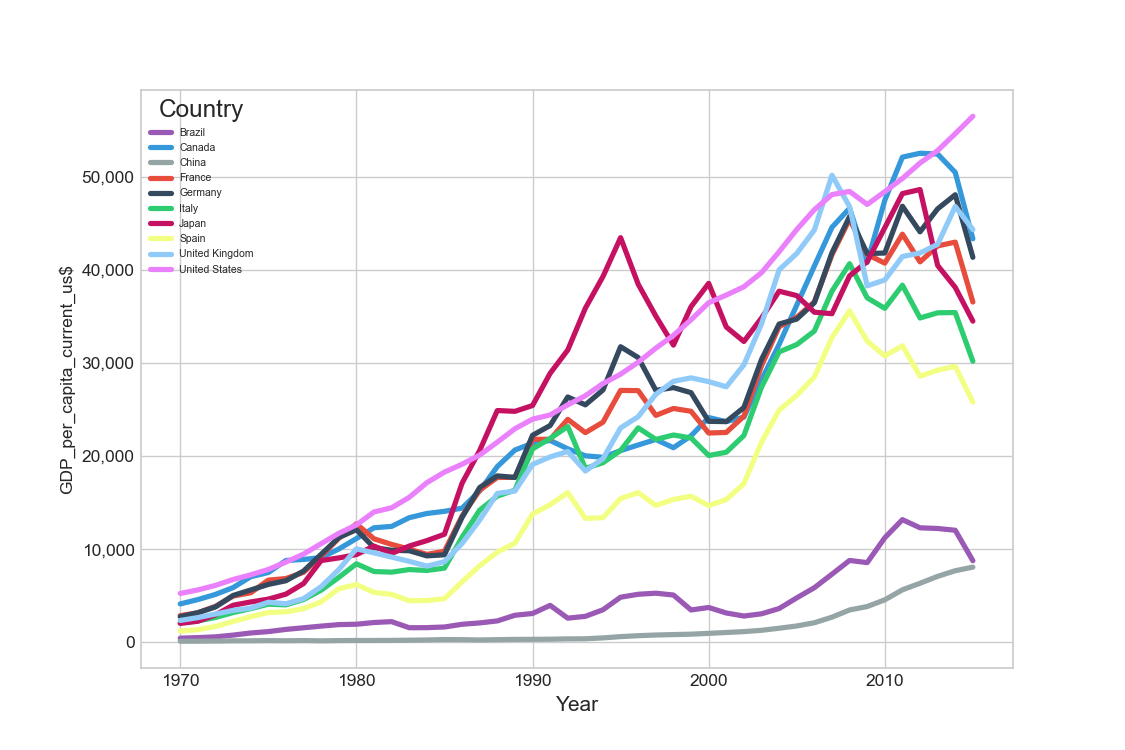

Text(0, 0.5, 'GDP_per_capita_current_us$')

In [147]:

# Tous les pays affichent une augmentation jusqu'en 2010.

# Ils affichent une baisse après 2010 jusqu'en 2015 à l'exception des États-Unis.


# Le syntax en dessous 

# Ranger le Data Frame avec pivot table

gdppc = df_sub.pivot_table(index='Year',columns='Country Name',values='GDP_per_capita_current_us$')

# Selecter quelque colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#C51162","#f3ff82","#90CAF9","#EA80FC"]
# Utilisez Seaborn pour configurer une carte de couleurs à utiliser par matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Définissez la taille de la figure et obtenez un objet figure et axe

fig, ax = plt.subplots(figsize=(9,6))

# diagramme à l'aide de l'axe de l'axe et de la palette de couleurs my cmap
gdppc.loc[1970:].plot(ax=ax, linewidth=3, cmap=my_cmap)

# Modifier les options des axes, de la légende
ax.tick_params(axis = 'both', which = 'major', labelsize=10)
ax.tick_params(axis = 'both', which = 'minor', labelsize=10)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 6}).set_title("Country", prop = {'size':14})

# Label axes
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('GDP_per_capita_current_us$', fontsize=10)

### L'évolution de l'accès à internet dans dix premiers pays

<IPython.core.display.Javascript object>


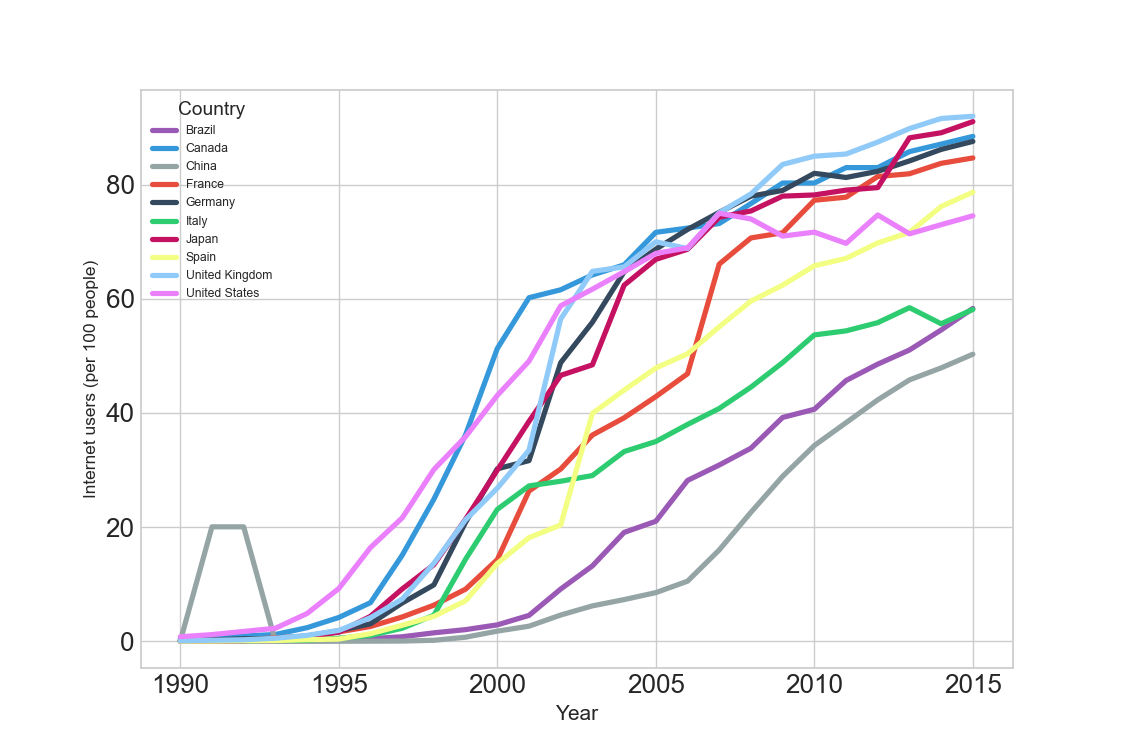

Text(0, 0.5, 'Internet users (per 100 people)')

In [148]:
# Le graphique commence à partir de l'année 1990 et montre une augmentation constante pour tous les pays

# Le syntax en dessous 

# Ranger avec Pivot table

Internet = df_sub.pivot_table(index='Year',columns='Country Name',values='Internet users (per 100 people)')

mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#C51162","#f3ff82","#90CAF9","#EA80FC"]
# Utilisez Seaborn pour configurer une carte de couleurs à utiliser par matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Définissez la taille de la figure et obtenez un objet figure et axe

fig, ax = plt.subplots(figsize=(9,6))

# diagramme à l'aide de l'axe de l'axe et de la palette de couleurs my cmap
Internet.loc[1990:].plot(ax=ax, linewidth=3, cmap=my_cmap)

# Modifier les options des axes, de la légende
ax.tick_params(axis = 'both', which = 'major', labelsize=15)
ax.tick_params(axis = 'both', which = 'minor', labelsize=10)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 7}).set_title("Country", prop = {'size':11})

# Label axes
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Internet users (per 100 people)', fontsize=10)

### L'évolution de population total  dans dix premiers pays

<IPython.core.display.Javascript object>


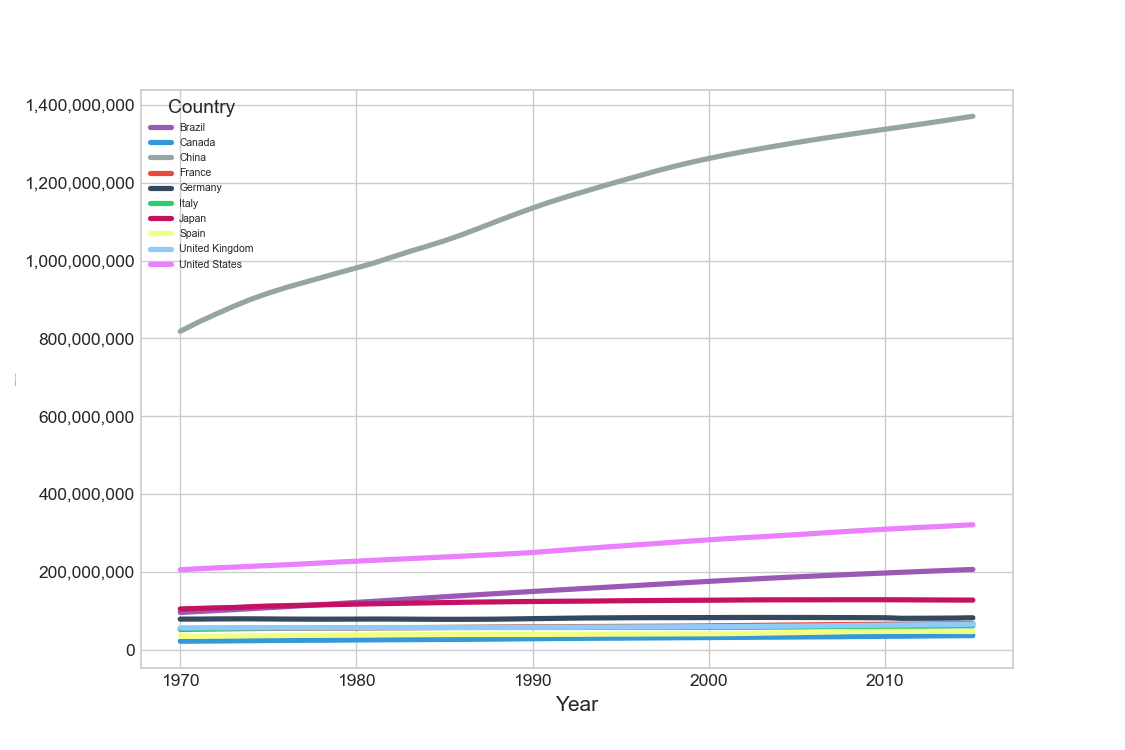

Text(0, 0.5, 'Population, total')

In [149]:
# la Chine affiche une évolution de la croissance démographique plus élevée


# Le syntax en dessous 

# Ranger avec Pivot table

population = df_sub.pivot_table(index='Year',columns='Country Name',values='Population, total')

mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#C51162","#f3ff82","#90CAF9","#EA80FC"]
# Utilisez Seaborn pour configurer une carte de couleurs à utiliser par matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Définissez la taille de la figure et obtenez un objet figure et axe

fig, ax = plt.subplots(figsize=(9,6))

# diagramme à l'aide de l'axe de l'axe et de la palette de couleurs my cmap
population.loc[1970:].plot(ax=ax, linewidth=3, cmap=my_cmap)

# Modifier les options des axes, de la légende
ax.tick_params(axis = 'both', which = 'major', labelsize=10)
ax.tick_params(axis = 'both', which = 'minor', labelsize=8)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 6}).set_title("Country", prop = {'size':11})

# Label axes
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population, total', fontsize=1)

### L'évolution de population  par tranche d'âge de 15 à 24 ans  dans dix premiers pays

<IPython.core.display.Javascript object>


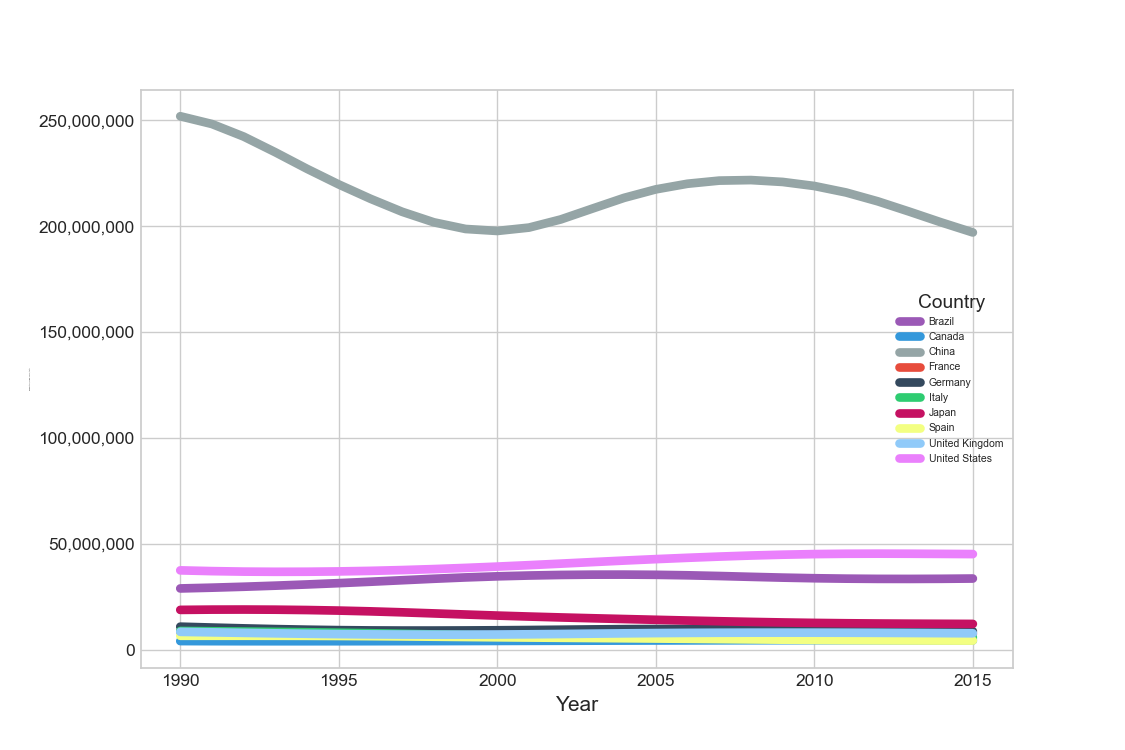

Text(0, 0.5, 'Population, ages 15-24, total')

In [150]:

# La Chine affiche une baisse de 50 millions entre 1970 et 2015

# l'autres pays restent stables pendant les periods

# Le syntax en dessous 


# Ranger avec Pivot table

population_jeune= df_sub.pivot_table(index='Year',columns='Country Name',values='Population, ages 15-24, total')

mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#C51162","#f3ff82","#90CAF9","#EA80FC"]
# Utilisez Seaborn pour configurer une carte de couleurs à utiliser par matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Définissez la taille de la figure et obtenez un objet figure et axe

fig, ax = plt.subplots(figsize=(9,6))

# diagramme à l'aide de l'axe de l'axe et de la palette de couleurs my cmap
population_jeune.loc[1990:].plot(ax=ax, linewidth=5, cmap=my_cmap)

# Modifier les options des axes, de la légende
ax.tick_params(axis = 'both', which = 'major', labelsize=10)
ax.tick_params(axis = 'both', which = 'minor', labelsize=8)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 6}).set_title("Country", prop = {'size':11})

# Label axes
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population, ages 15-24, total', fontsize=1)

### L'évolution d'étudiants du secondaire dans dix premiers pays

<IPython.core.display.Javascript object>


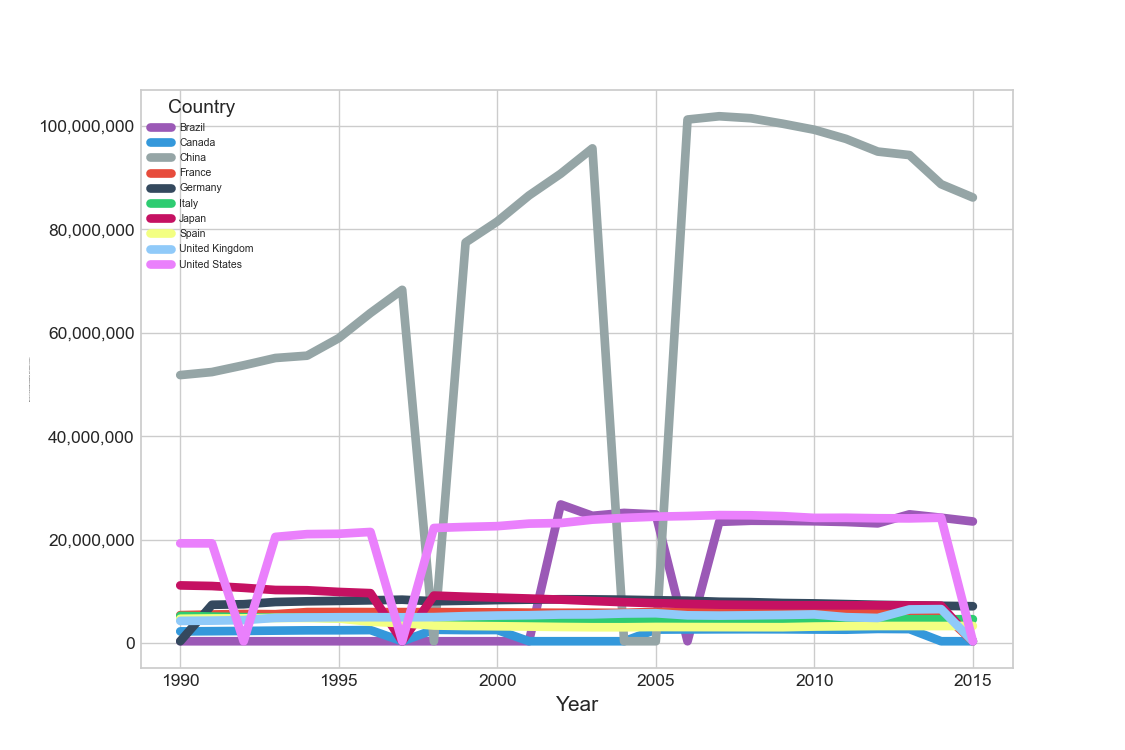

Text(0, 0.5, 'Enrolment in secondary education, both sexes (number)')

In [151]:

# Les graphiques du nombre d'élèves du secondaire ne sont pas assez intuitifs 


# Le syntax en dessous 

# Ranger avec Pivot table

Etudients_secondaire= df_sub.pivot_table(index='Year',columns='Country Name',values='Enrolment in secondary education, both sexes (number)')

mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#C51162","#f3ff82","#90CAF9","#EA80FC"]
# Utilisez Seaborn pour configurer une carte de couleurs à utiliser par matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Définissez la taille de la figure et obtenez un objet figure et axe

fig, ax = plt.subplots(figsize=(9,6))

# diagramme à l'aide de l'axe de l'axe et de la palette de couleurs my cmap
Etudients_secondaire.loc[1990:].plot(ax=ax, linewidth=5, cmap=my_cmap)

# Modifier les options des axes, de la légende
ax.tick_params(axis = 'both', which = 'major', labelsize=10)
ax.tick_params(axis = 'both', which = 'minor', labelsize=8)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 6}).set_title("Country", prop = {'size':11})

# Label axes
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Enrolment in secondary education, both sexes (number)', fontsize=1)

### L'évolution d'Étudiants de l'enseignement supérieur dans dix premiers pays

<IPython.core.display.Javascript object>


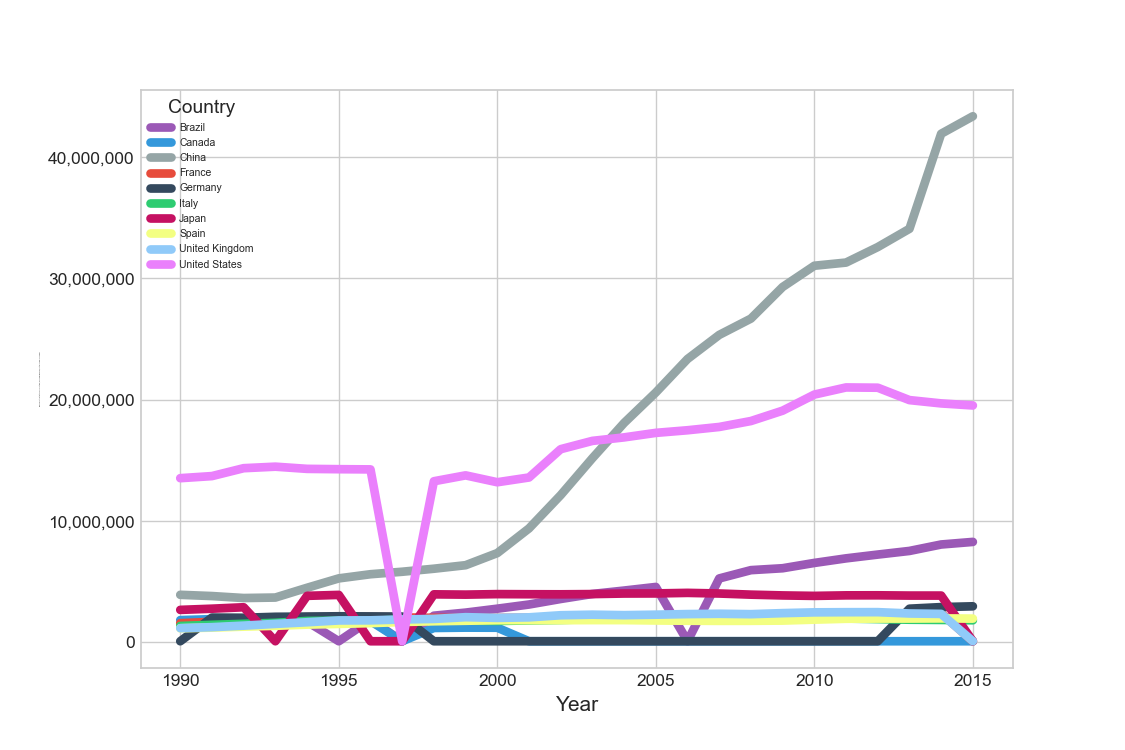

Text(0, 0.5, 'Enrolment in tertiary education, all programmes, both sexes (number)')

In [152]:

# À l'exception de la Chine et des États-Unis, l'évolution des étudiants de l'enseignement supérieur ne montre pas de changement.

# Le syntax en dessous 

# Ranger avec Pivot table

Etudients_tertiaire= df_sub.pivot_table(index='Year',columns='Country Name',values='Enrolment in tertiary education, all programmes, both sexes (number)')

mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#C51162","#f3ff82","#90CAF9","#EA80FC"]
# Utilisez Seaborn pour configurer une carte de couleurs à utiliser par matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())

# Définissez la taille de la figure et obtenez un objet figure et axe

fig, ax = plt.subplots(figsize=(9,6))

# diagramme à l'aide de l'axe de l'axe et de la palette de couleurs my cmap
Etudients_tertiaire.loc[1990:].plot(ax=ax, linewidth=5, cmap=my_cmap)

# Modifier les options des axes, de la légende
ax.tick_params(axis = 'both', which = 'major', labelsize=10)
ax.tick_params(axis = 'both', which = 'minor', labelsize=8)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 6}).set_title("Country", prop = {'size':11})

# Label axes
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Enrolment in tertiary education, all programmes, both sexes (number)', fontsize=1)